In [49]:
import pandas as pd
from pandasql import sqldf
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn import linear_model
import statsmodels.api as sm

In [50]:
# Lecture 1 Exercise 2, Estimate Betas
nasdaq = pd.read_sas("crsp_nasdaq100_1999to2021.sas7bdat", encoding = 'latin-1')
nasdaq["yyyymm"] = nasdaq.DATE.dt.year*100 + nasdaq.DATE.dt.month
nasdaq["monthid"] = (nasdaq.DATE.dt.year-2000)*12 + nasdaq.DATE.dt.month

ff_factors = pd.read_sas("factors_monthly.sas7bdat", encoding = 'latin-1')
# ff_factors["yyyymm"] = ff_factors.dateff.dt.year*100 + ff_factors.dateff.dt.month
ff_factors["monthid"] = (ff_factors.dateff.dt.year-2000)*12 + ff_factors.dateff.dt.month

print(nasdaq)
print(ff_factors)
ret_matrix = pd.merge(nasdaq, ff_factors, on="monthid")
ret_matrix["XRET"] = ret_matrix["RET"]-ret_matrix["rf"]
ret_matrix

        PERMNO       DATE     CUSIP          COMNAM TICKER   PERMCO  \
0      10107.0 1997-01-31  59491810  MICROSOFT CORP   MSFT   8048.0   
1      10107.0 1997-02-28  59491810  MICROSOFT CORP   MSFT   8048.0   
2      10107.0 1997-03-31  59491810  MICROSOFT CORP   MSFT   8048.0   
3      10107.0 1997-04-30  59491810  MICROSOFT CORP   MSFT   8048.0   
4      10107.0 1997-05-30  59491810  MICROSOFT CORP   MSFT   8048.0   
...        ...        ...       ...             ...    ...      ...   
22814  93436.0 2021-08-31  88160R10       TESLA INC   TSLA  53453.0   
22815  93436.0 2021-09-30  88160R10       TESLA INC   TSLA  53453.0   
22816  93436.0 2021-10-29  88160R10       TESLA INC   TSLA  53453.0   
22817  93436.0 2021-11-30  88160R10       TESLA INC   TSLA  53453.0   
22818  93436.0 2021-12-31  88160R10       TESLA INC   TSLA  53453.0   

               PRC        VOL       RET  SPREAD     SHROUT    VWRETD  \
0       102.000000  1990370.0  0.234493     NaN  1198000.0  0.053441   
1  

,PERMNO,DATE,CUSIP,COMNAM,TICKER,PERMCO,PRC,VOL,RET,SPREAD,...,date,mktrf,smb,hml,rf,year,month,umd,dateff,XRET
0,10107.0,1997-01-31,59491810,MICROSOFT CORP,MSFT,8048.0,102.000000,1990370.0,0.234493,NaN,...,1997-01-01,0.0499,-0.0195,-0.0142,0.0045,1997.0,1.0,0.0196,1997-01-31,0.229993
1,10145.0,1997-01-31,43851610,ALLIED SIGNAL INC,ALD,22168.0,70.375000,117095.0,0.050373,NaN,...,1997-01-01,0.0499,-0.0195,-0.0142,0.0045,1997.0,1.0,0.0196,1997-01-31,0.045873
2,10696.0,1997-01-31,33773810,FISERV INC,FISV,8598.0,33.437500,61921.0,-0.090136,NaN,...,1997-01-01,0.0499,-0.0195,-0.0142,0.0045,1997.0,1.0,0.0196,1997-01-31,-0.094636
3,11403.0,1997-01-31,12738710,CADENCE DESIGN SYSTEMS INC,CDN,9245.0,38.250000,178086.0,-0.031646,NaN,...,1997-01-01,0.0499,-0.0195,-0.0142,0.0045,1997.0,1.0,0.0196,1997-01-31,-0.036146
4,11618.0,1997-01-31,31190010,FASTENAL COMPANY,FAST,9440.0,37.750000,78320.0,-0.174863,NaN,...,1997-01-01,0.0499,-0.0195,-0.0142,0.0045,1997.0,1.0,0.0196,1997-01-31,-0.179363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22814,92221.0,2021-12-31,58733R10,MERCADOLIBRE INC,MELI,52670.0,1348.400024,164061.0,0.134625,NaN,...,2021-12-01,0.0310,-0.0166,0.0328,0.0001,2021.0,12.0,-0.0260,2021-12-31,0.134525
22815,93002.0,2021-12-31,11135F10,BROADCOM INC,AVGO,53196.0,665.409973,598582.0,0.209200,NaN,...,2021-12-01,0.0310,-0.0166,0.0328,0.0001,2021.0,12.0,-0.0260,2021-12-31,0.209100
22816,93089.0,2021-12-31,92345Y10,VERISK ANALYTICS INC,VRSK,53256.0,228.729996,212631.0,0.018455,NaN,...,2021-12-01,0.0310,-0.0166,0.0328,0.0001,2021.0,12.0,-0.0260,2021-12-31,0.018355
22817,93132.0,2021-12-31,34959E10,FORTINET INC,FTNT,53286.0,359.399994,363506.0,0.082172,NaN,...,2021-12-01,0.0310,-0.0166,0.0328,0.0001,2021.0,12.0,-0.0260,2021-12-31,0.082072


In [51]:
ret_matrix = pd.merge(nasdaq, ff_factors, on="monthid")
ret_matrix["XRET"] = ret_matrix["RET"]-ret_matrix["rf"]
ret_matrix.columns = ['month_start' if x=='date' else x for x in ret_matrix.columns]

data = sqldf("SELECT i.PERMNO, i.monthid, j.monthid as monthid2, j.XRET, j.MKTRF, j.SMB, j.HML \
              FROM ret_matrix AS i, ret_matrix AS j \
              WHERE i.PERMNO = j.PERMNO AND i.monthid > j.monthid AND i.monthid <= j.monthid + 36")
dataSorted = data.sort_values(["PERMNO", "monthid", "monthid2"])
dataSorted["stock_monthid"] = dataSorted["PERMNO"].astype(str) + dataSorted["monthid"].astype(str)
dataSorted.dropna(inplace=True)
dataSorted

,PERMNO,monthid,monthid2,XRET,mktrf,smb,hml,stock_monthid
0,10107.0,-34,-35,0.229993,0.0499,-0.0195,-0.0142,10107.0-34
51,10107.0,-33,-35,0.229993,0.0499,-0.0195,-0.0142,10107.0-33
52,10107.0,-33,-34,-0.048018,-0.0049,-0.0322,0.0567,10107.0-33
153,10107.0,-32,-35,0.229993,0.0499,-0.0195,-0.0142,10107.0-32
154,10107.0,-32,-34,-0.048018,-0.0049,-0.0322,0.0567,10107.0-32
...,...,...,...,...,...,...,...,...
755867,93436.0,264,259,0.011034,0.0127,-0.0399,-0.0176,93436.0264
755868,93436.0,264,260,0.070605,0.0291,-0.0043,-0.0016,93436.0264
755869,93436.0,264,261,0.054042,-0.0437,0.0072,0.0508,93436.0264
755870,93436.0,264,262,0.436530,0.0665,-0.0235,-0.0048,93436.0264


In [1]:
#This creates the "mini datasets" (36 month lookback) to calculate beta for each stock and each time period
#Then it calculates betas for each time period and stock I think

company_month_groups = dataSorted.groupby(["stock_monthid"])

beta = {'PERMNO':[], 'monthid':[], 'beta': [], 'ff3_beta':[], 'smb_beta':[], 'hml_beta':[]}

for name, group in company_month_groups:
    CAPMmodel = linear_model.LinearRegression().fit(group[["mktrf"]], group["XRET"])
    ff3model = linear_model.LinearRegression().fit(group[["mktrf", "smb", "hml"]], group["XRET"])
    beta['PERMNO'].append(group['PERMNO'].iloc[0])
    beta['monthid'].append(group['monthid'].iloc[0])
    beta['beta'].append(CAPMmodel.coef_[0])
    beta['ff3_beta'].append(ff3model.coef_[0])
    beta['smb_beta'].append(ff3model.coef_[1])
    beta['hml_beta'].append(ff3model.coef_[2])
    
betaDF = pd.DataFrame(beta)
lecture1 = pd.merge(ret_matrix, betaDF, on=["PERMNO", "monthid"])
lecture1Sorted = lecture1.sort_values(["monthid", "beta"])
# lecture1Sorted

    
#     excess_ret = group["RET"]-group["RF"]
#     print(name)
#     print(stats.linregress(group["MKTRF"], excess_ret))

NameError: name 'dataSorted' is not defined

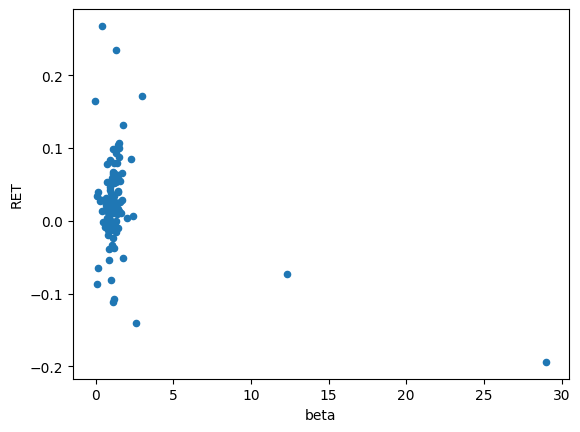

In [53]:
# Lecture 1 Exercise 2 plot

lecture1Sorted.loc[lecture1Sorted["yyyymm"]==201912].plot(kind = 'scatter', x = 'beta', y = 'RET')
# plt.xlim([0, 3])
plt.show()

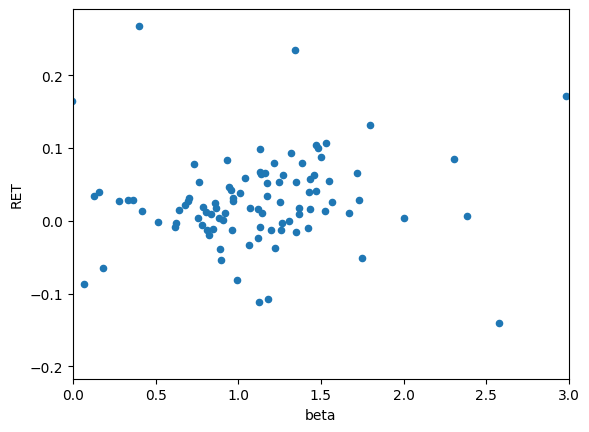

In [54]:
lecture1Sorted.loc[lecture1Sorted["yyyymm"]==201912].plot(kind = 'scatter', x = 'beta', y = 'RET')
plt.xlim([0, 3])
plt.show()

In [55]:
lecture1Sorted = lecture1Sorted.loc[(lecture1Sorted['yyyymm']>=200501) & (lecture1Sorted['yyyymm']<=202012)]

lecture1Sorted["beta_rank"] = lecture1Sorted.groupby(['monthid'])['beta'].transform(
                     lambda x: pd.qcut(x, 10, labels=False))

# lecture1Sorted["beta_rank"] = pd.qcut(lecture1Sorted["beta"], 10, labels = False)


# for name, group in lecture1Groups:
#     group["beta_rank"] = pd.qcut(group["beta"], 10, labels = False)

# lecture1Sorted = pd.concat(lecture1Groups)
    
# lecture1Sorted["beta_rank"] = pd.qcut(lecture1Sorted["beta"], 10, labels = False)
lecture1Sorted.sort_values(["monthid", "beta_rank"])

,PERMNO,DATE,CUSIP,COMNAM,TICKER,PERMCO,PRC,VOL,RET,SPREAD,...,year,month,umd,dateff,XRET,beta,ff3_beta,smb_beta,hml_beta,beta_rank
5851,90319.0,2005-01-31,02079K30,GOOGLE INC,GOOG,45483.0,195.619995,2049127.0,0.014679,NaN,...,2005.0,1.0,0.0305,2005-01-31,0.013079,-14.403749,-21.304158,-7.776492,25.909868,0
5816,76709.0,2005-01-31,45168D10,I D E X X LABORATORIES INC,IDXX,10989.0,58.009998,43605.0,0.062649,NaN,...,2005.0,1.0,0.0305,2005-01-31,0.061049,0.203270,0.155626,-0.021319,-1.323978,0
5850,89525.0,2005-01-31,20030N10,COMCAST CORP NEW,CMCSA,43613.0,32.189999,1766967.0,-0.032752,NaN,...,2005.0,1.0,0.0305,2005-01-31,-0.034352,0.206282,0.404455,-0.465678,-1.011741,0
5818,76841.0,2005-01-31,09062X10,BIOGEN IDEC INC,BIIB,11112.0,64.959999,779225.0,-0.024771,NaN,...,2005.0,1.0,0.0305,2005-01-31,-0.026371,0.274328,0.272319,-0.603450,-1.573750,0
5796,21776.0,2005-01-31,30161N10,EXELON CORP,EXC,21396.0,44.250000,470691.0,0.004084,NaN,...,2005.0,1.0,0.0305,2005-01-31,0.002484,0.358467,0.383115,-0.037361,0.563026,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21401,78987.0,2020-12-31,59501710,MICROCHIP TECHNOLOGY INC,MCHP,12027.0,138.110001,392265.0,0.027681,NaN,...,2020.0,12.0,-0.0232,2020-12-31,0.027581,1.698481,1.361064,1.076134,0.622281,9
21412,85913.0,2020-12-31,57190320,MARRIOTT INTERNATIONAL INC NEW,MAR,30005.0,131.919998,407301.0,0.039804,NaN,...,2020.0,12.0,-0.0232,2020-12-31,0.039704,1.801984,1.568730,0.336921,0.894572,9
21385,61241.0,2020-12-31,00790310,ADVANCED MICRO DEVICES INC,AMD,211.0,91.709999,8486992.0,-0.010253,NaN,...,2020.0,12.0,-0.0232,2020-12-31,-0.010353,1.906616,2.392240,-0.841623,-1.702529,9
21367,18312.0,2020-12-31,60770K10,MODERNA INC,MRNA,56611.0,104.470001,7560353.0,-0.316027,NaN,...,2020.0,12.0,-0.0232,2020-12-31,-0.316127,1.913942,1.354136,6.000297,-2.486593,9


In [56]:
# Lecture 1 2.2 Get deciles

lecture1Sorted["monthid_beta"] = lecture1Sorted["monthid"].astype(str) + lecture1Sorted["beta_rank"].astype(str)
betaGroups = lecture1Sorted.groupby(["monthid_beta"])

deciles = {'monthid':[], 'beta_rank':[], 'freq':[], 'return':[], 'beta':[], 'ff3_beta':[], 'smb_beta':[], 'hml_beta':[]}

for name, group in betaGroups:
    deciles['monthid'].append(group['monthid'].iloc[0])
    deciles['beta_rank'].append(group['beta_rank'].iloc[0])
    deciles['freq'].append(group.shape[0])
    deciles['return'].append(group['RET'].mean())
    deciles['beta'].append(group['beta'].mean())
    deciles['ff3_beta'].append(group['ff3_beta'].mean())
    deciles['smb_beta'].append(group['smb_beta'].mean())
    deciles['hml_beta'].append(group['hml_beta'].mean())

decilesDF = pd.DataFrame(deciles)
decilesDF.sort_values(["monthid", 'beta_rank'])

    


,monthid,beta_rank,freq,return,beta,ff3_beta,smb_beta,hml_beta
1530,61,0,7,0.000047,-1.777190,-2.729984,-1.291542,3.393934
1531,61,1,7,-0.046532,0.575520,0.565905,0.116111,0.036134
1532,61,2,7,-0.009728,0.842867,0.761714,0.628237,-0.581052
1533,61,3,6,-0.104284,1.054451,1.001734,0.382011,-0.443172
1534,61,4,7,0.001729,1.250902,1.210638,0.238366,-0.473042
...,...,...,...,...,...,...,...,...
1525,252,5,10,0.102393,1.003257,0.960182,0.405126,-0.226061
1526,252,6,9,0.042056,1.093397,1.109458,0.034252,-0.127152
1527,252,7,10,0.089551,1.193230,1.247394,0.642481,-0.591456
1528,252,8,10,0.035638,1.339235,1.270551,0.644319,-0.358561


In [57]:
firstDecile = decilesDF.loc[decilesDF['beta_rank']==0]
tenthDecile = decilesDF.loc[decilesDF['beta_rank']==9]
hedge = pd.merge(firstDecile, tenthDecile, on=["monthid"])
hedge["hedge_ret"] = hedge["return_y"]-hedge["return_x"]

print(stats.ttest_ind(tenthDecile['return'], firstDecile['return']))
print(stats.ttest_ind(hedge['return_y'], hedge['return_x']))

# T Stats different

TtestResult(statistic=1.0106434918844787, pvalue=0.31282680656506806, df=382.0)
TtestResult(statistic=1.0106434918844787, pvalue=0.31282680656506806, df=382.0)


In [58]:
hedge = pd.merge(hedge, ff_factors, on=["monthid"])
hedge.sort_values(["monthid"])

,monthid,beta_rank_x,freq_x,return_x,beta_x,ff3_beta_x,smb_beta_x,hml_beta_x,beta_rank_y,freq_y,...,hedge_ret,date,mktrf,smb,hml,rf,year,month,umd,dateff
153,61,0,7,0.000047,-1.777190,-2.729984,-1.291542,3.393934,9,7,...,-0.095647,2005-01-01,-0.0276,-0.0172,0.0206,0.0016,2005.0,1.0,0.0305,2005-01-31
154,62,0,7,-0.048830,0.187085,-0.544756,0.290099,-3.115435,9,7,...,0.107187,2005-02-01,0.0189,-0.0057,0.0153,0.0016,2005.0,2.0,0.0337,2005-02-28
155,63,0,7,-0.014643,0.165122,-0.487803,0.413116,-3.174228,9,7,...,-0.027537,2005-03-01,-0.0197,-0.0140,0.0204,0.0021,2005.0,3.0,0.0041,2005-03-31
156,64,0,7,-0.010555,0.344489,0.345558,0.056398,-0.488655,9,7,...,-0.094194,2005-04-01,-0.0261,-0.0393,0.0006,0.0021,2005.0,4.0,-0.0069,2005-04-29
157,65,0,7,0.063370,0.231663,-0.362675,0.251357,-3.084974,9,7,...,0.099278,2005-05-01,0.0365,0.0289,-0.0064,0.0024,2005.0,5.0,0.0045,2005-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,248,0,10,0.025396,0.212069,0.264119,0.429038,-0.451187,9,10,...,0.051174,2020-08-01,0.0763,-0.0022,-0.0295,0.0001,2020.0,8.0,0.0055,2020-08-31
149,249,0,10,0.015533,0.219126,0.268848,0.423770,-0.447951,9,10,...,-0.036634,2020-09-01,-0.0363,0.0004,-0.0268,0.0001,2020.0,9.0,0.0314,2020-09-30
150,250,0,10,-0.014893,0.215125,0.222566,0.582167,-0.381474,9,10,...,0.042735,2020-10-01,-0.0210,0.0436,0.0421,0.0001,2020.0,10.0,-0.0304,2020-10-30
151,251,0,10,0.032147,0.228425,0.274661,0.415084,-0.419194,9,10,...,0.184277,2020-11-01,0.1247,0.0582,0.0214,0.0001,2020.0,11.0,-0.1243,2020-11-30


In [59]:
# Lecture 2 Exercise 1

lecture2 = pd.merge(decilesDF, ff_factors, on=["monthid"])
lecture2['XRET'] = lecture2["return"]-lecture2["rf"]
lecture2.sort_values(["monthid", "beta_rank"])
betaGroups = lecture2.groupby(["beta_rank"])

lecture2_output = {'beta_rank':[], 'freq':[], 'alpha':[], 'xret':[], 'xret_std':[]}

for name, group in betaGroups:
    CAPMmodel = linear_model.LinearRegression().fit(group[["mktrf"]], group["XRET"])
    lecture2_output['beta_rank'].append(group['beta_rank'].iloc[0])
    lecture2_output['freq'].append(group.shape[0])
    lecture2_output['alpha'].append(CAPMmodel.intercept_)
    lecture2_output['xret'].append(group["XRET"].mean())
    lecture2_output['xret_std'].append(group["XRET"].std())
    

lecture2_df = pd.DataFrame(lecture2_output)
lecture2_df['volatility'] = math.sqrt(12)*lecture2_df['xret_std']
lecture2_df['sharpe'] = 12*lecture2_df['xret']/lecture2_df['volatility']
lecture2_df



,beta_rank,freq,alpha,xret,xret_std,volatility,sharpe
0,0,192,0.009570,0.015468,0.049009,0.169774,1.093309
1,1,192,0.009541,0.016277,0.048987,0.169696,1.150993
2,2,192,0.012631,0.019362,0.047939,0.166067,1.399092
3,3,192,0.008944,0.016504,0.051550,0.178575,1.109042
4,4,192,0.008249,0.016240,0.054888,0.190136,1.024970
5,5,192,0.007847,0.017199,0.062423,0.216240,0.954452
6,6,192,0.008508,0.017430,0.058455,0.202493,1.032929
7,7,192,0.009165,0.019210,0.064579,0.223709,1.030431
8,8,192,0.010223,0.020098,0.069407,0.240431,1.003088
9,9,192,0.010416,0.022720,0.086762,0.300554,0.907113


In [60]:
# Lecture 2 Hedge stats
lecture2_hedge = {'alpha':[], 'freq':[], 'ret':[], 'ret_std':[]}

CAPMmodel = linear_model.LinearRegression().fit(hedge[["mktrf"]], hedge["hedge_ret"])
lecture2_hedge['alpha'].append(CAPMmodel.intercept_)
lecture2_hedge['freq'].append(hedge.shape[0])
lecture2_hedge['ret'].append(hedge['hedge_ret'].mean())
lecture2_hedge['ret_std'].append(hedge['hedge_ret'].std())
lecture2_hedgeDF = pd.DataFrame(lecture2_hedge)

lecture2_hedgeDF['volatility'] = math.sqrt(12)*lecture2_hedgeDF['ret_std']
lecture2_hedgeDF['sharpe'] = 12*lecture2_hedgeDF['ret']/lecture2_hedgeDF['volatility']
lecture2_hedgeDF


,alpha,freq,ret,ret_std,volatility,sharpe
0,0.000846,192,0.007252,0.06974,0.241585,0.360208


In [61]:
# Lecture 3 Exercise 1 part 1
CAPMexplanatory = lecture1Sorted[["beta"]].loc[lecture1Sorted["yyyymm"]==201912]
ff3explanatory = lecture1Sorted[["ff3_beta", "smb_beta", "hml_beta"]].loc[lecture1Sorted["yyyymm"]==201912]
dependent = lecture1Sorted["XRET"].loc[lecture1Sorted["yyyymm"]==201912]
CAPMmodel = linear_model.LinearRegression().fit(CAPMexplanatory, dependent)
ff3_model = linear_model.LinearRegression().fit(ff3explanatory, dependent)

# lecture1Sorted["XRET"].loc[lecture1Sorted["yyyymm"]==201912]
print("CAPM:")
print('Intercept: \n', CAPMmodel.intercept_)
print('Coefficients: \n', CAPMmodel.coef_)
print("FF3:")
print('Intercept: \n', ff3_model.intercept_)
print('Coefficients: \n', ff3_model.coef_)

CAPM:
Intercept: 
 0.034262112838020914
Coefficients: 
 [-0.00754916]
FF3:
Intercept: 
 0.043605865295469434
Coefficients: 
 [-0.006722   -0.00248043  0.02001873]


In [62]:
# Lecture 3 Exercise 1 part 2
CAPMexplanatory = decilesDF[["beta"]].loc[decilesDF["monthid"]==240]
ff3explanatory = decilesDF[["ff3_beta", "smb_beta", "hml_beta"]].loc[decilesDF["monthid"]==240]
dependent = decilesDF["return"].loc[decilesDF["monthid"]==240]
CAPMmodel = linear_model.LinearRegression().fit(CAPMexplanatory, dependent)
ff3_model = linear_model.LinearRegression().fit(ff3explanatory, dependent)

print("CAPM:")
print('Intercept: \n', CAPMmodel.intercept_)
print('Coefficients: \n', CAPMmodel.coef_)
print("FF3:")
print('Intercept: \n', ff3_model.intercept_)
print('Coefficients: \n', ff3_model.coef_)
# decilesDF.loc[decilesDF["monthid"=240]]

CAPM:
Intercept: 
 0.03213984245830021
Coefficients: 
 [-0.00517953]
FF3:
Intercept: 
 0.03864572967790985
Coefficients: 
 [0.00360271 0.00762523 0.03689948]


In [63]:
# Lecture 3 Exercise 1.2

# lecture1Sorted.loc[lecture1Sorted["yyyymm"]>=200501]
